In [25]:
%cd src

[Errno 2] No such file or directory: 'src'
/home/romet/projects/ut/automl/src
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

from dataloader import load_data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
train, test = load_data()
y = train.target.values

Reading training data...
Train length:  200000
Loading test...
Removing synthetic data from test


  0%|          | 0/200 [00:00<?, ?it/s]

real_samples_indexes 100000
synthetic_samples_indexes 100000
Frequency encoding...


/home/romet/projects/ut/automl/src/dataloader.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  traintest[col + '_freq'] = traintest[col].map(traintest.groupby(col).size())


Train and test shape: (200000, 402) (200000, 401)
Test length:  200000
Scaling data...
(200000, 400)
(200000, 400)


In [69]:
def draw_roc_curve(fpr, tpr, roc_score, algo_name):
    lw=2
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label=f"ROC curve (area = {roc_score:0.4f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.title(algo_name)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    plt.legend(loc="lower right")
    plt.show()

In [77]:
oof_predictions = {
    'LogisticRegression': '../kfolds/LogisticRegression__folds5__0.8663441978741692.csv',
    'RandomForest': '../kfolds/RandomForest__folds5__0.8195112925055461.csv',
    'ExtraTrees': '../kfolds/ExtraTrees__folds5__0.5228970489377539.csv',
    'NaiveBayes': '../kfolds/NaiveBayes__folds5__0.8612345299629462.csv',
    'LightGBM': '../kfolds/LightGBM__folds5__0.8949656737461088.csv',
    'XGBoost': '../kfolds/XGBoost__folds5__0.8644135937992727.csv',
    #'KNeighbors': '../kfolds/KNeighbors__folds5__0.6367726738840365.csv'
}

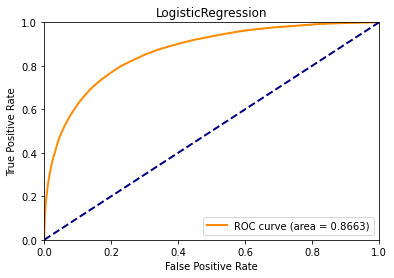

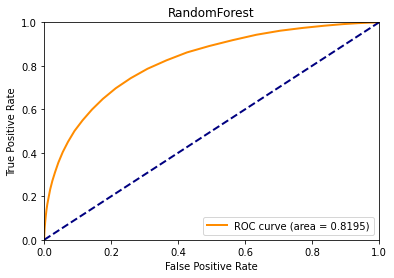

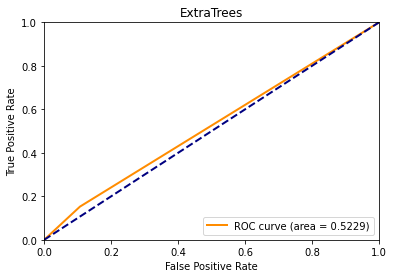

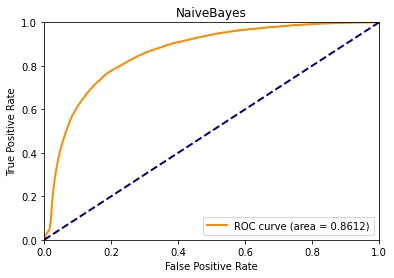

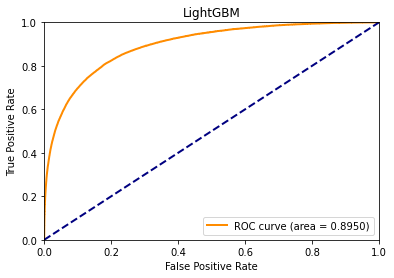

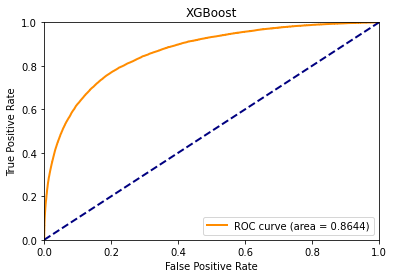

In [78]:
for algo, oof_file in oof_predictions.items():
    result_df = pd.read_csv(oof_file)
    preds = result_df['target'].to_numpy()
    roc_score = roc_auc_score(y, preds)
    fpr, tpr, thresholds = roc_curve(y, preds)
    draw_roc_curve(fpr, tpr, roc_score, algo)
    